In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_A = pd.read_csv('data/yields_iso.csv')
data_A

,Name,ID,Yield_CO_1.5h,Yield_CO_7.5h,Yield_CO_biphenyl,Yield_CO_ortho,Yield_CO_Cl,Yield_CS,Yield_CN,Yield_2+2,Yield_iso
0,4OMeCzIPN,OPS5,33,87,52,31,24,0,33,0,4
1,1CzTRZ,OPS20,16,79,40,29,33,0,7,1,1
2,1tBuDPATRZ,OPS23,16,73,28,20,30,97,82,39,56
3,1PhDPATRZ,OPS27,38,79,45,26,34,97,85,26,41
4,2DPABP,OPS31,1,39,14,9,27,9,99,47,59
5,2ClDPABP,OPS34,1,34,13,13,22,5,99,47,49
6,2DPAAQ,OPS59,0,0,0,0,0,0,0,0,0
7,C_498,OPS83,0,2,2,0,0,5,18,0,5


In [3]:
data_A = data_A.drop(columns = ['Name', 'ID'])
corr_matrix_A = data_A.corr()
corr = corr_matrix_A.loc[['Yield_iso'], :]
corr = np.array(corr)
columns = ['Yield_CO_1.5h', 'Yield_CO_7.5h', 'Yield_CO_biphenyl', 'Yield_CO_ortho', 'Yield_CO_Cl',
           'Yield_CS', 'Yield_CN', 'Yield_2+2', 'Yield_iso']
corr = pd.DataFrame(data=corr, columns=columns)
corr.index = corr.index.map(lambda x: 'Yield_iso' if x == 0 else x)
corr

,Yield_CO_1.5h,Yield_CO_7.5h,Yield_CO_biphenyl,Yield_CO_ortho,Yield_CO_Cl,Yield_CS,Yield_CN,Yield_2+2,Yield_iso
Yield_iso,-0.038874,0.177366,-0.02148,0.02894,0.509675,0.552576,0.963073,0.978039,1.0


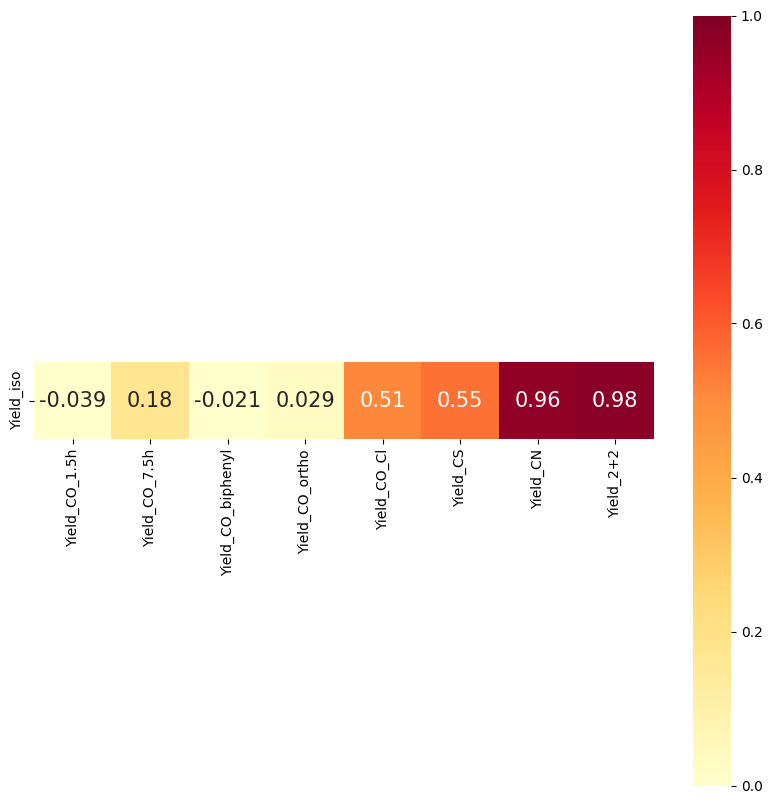

In [4]:
corr = corr.drop(columns = ['Yield_iso'])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, square=True, cmap='YlOrRd', annot_kws={'size': 15}, vmin=0, vmax=1)
ax.set_aspect('equal', adjustable='box')
plt.show()